<a href="https://colab.research.google.com/github/neerajguleria1/driver-drowsiness-detection/blob/main/hyperparameter_turing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      Speed  Seatbelt  Alertness  HR  Fatigue  prev_alertness  speed_change  \
0        94         1   0.531937  94        6        0.531937           0.0   
1       108         0   0.692850  78        3        0.531937          14.0   
2       110         1   0.248338  97       10        0.692850           2.0   
3        78         0   0.359349  99        7        0.248338          32.0   
4        99         1   0.681798  65        4        0.359349          21.0   
...     ...       ...        ...  ..      ...             ...           ...   
1995     88         0   0.378877  86        7        0.156953          54.0   
1996     70         1   0.385769  78        8        0.378877          18.0   
1997    131         1   0.832770  90        3        0.385769          61.0   
1998    106         1   0.975822  61        0        0.832770          25.0   
1999     94         1   0.969392  70        0        0.975822          12.0   

      Fatigue_norm  Drowsy  
0              0.6    

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, yt, *

Best params: {'model__class_weight': 'balanced', 'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 200}

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.69      0.74       407
           1       0.50      0.65      0.57       193

    accuracy                           0.68       600
   macro avg       0.65      0.67      0.66       600
weighted avg       0.71      0.68      0.69       600



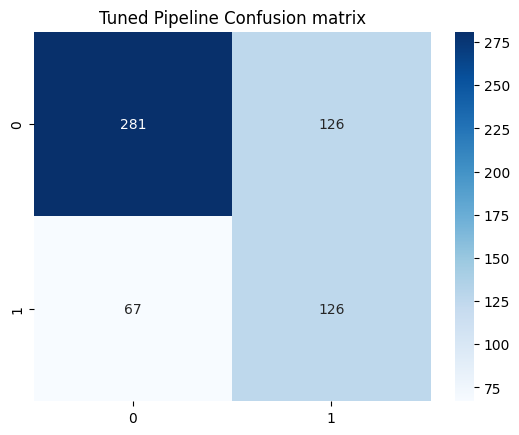

final_driver_drowsiness_pipeline.pkl


In [13]:
import pandas as pd
df=pd.read_csv("driver_drowsiness_training.csv")
print(df)
X=df[['Speed','Alertness','Seatbelt','HR','Fatigue','speed_change','prev_alertness']]
y=df['Drowsy']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.3,random_state=42,stratify=y
)

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

preprocess=ColumnTransformer([
    ('num',StandardScaler(),X.columns.tolist())
])

pipeline=Pipeline([
    ('preprocess',preprocess),
    ('smote',SMOTE(random_state=42)),
    ('model',RandomForestClassifier(random_state=42))
])

#Now we define hyperparameter grid
param_grid={
    'model__n_estimators':[200,300,400],
    'model__max_depth':[10,20,'None'],
    'model__min_samples_split':[2,5,10],
    'model__class_weight':['balanced']
}

from sklearn.model_selection import GridSearchCV

grid=GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=4,
    scoring='recall',
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train,y_train)

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_pipeline=grid.best_estimator_
y_pred=best_pipeline.predict(X_test)

print("Best params:",grid.best_params_)
print("\nClassification Report:\n",classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Tuned Pipeline Confusion matrix")
plt.show()

import joblib,os
os.makedirs("models",exist_ok=True)

joblib.dump(best_pipeline,"final_driver_drowsiness_pipeline.pkl")
print("final_driver_drowsiness_pipeline.pkl")